# Semana 8: Manipulación de Datos

## 🛠️ Transformación de Datos
Transformar los datos permite resumir, reorganizar y explorar patrones más fácilmente. Esto es útil para análisis descriptivos y comparativos.

### 🔄 Procesamiento de Datos Agrupados con `agg()`
Permite aplicar funciones de agregación (como promedio, suma, conteo) a grupos de datos.

In [1]:
import pandas as pd

df = pd.read_csv('Ejemplos/employees.csv')
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [2]:
df.groupby("Team")["Salary"].agg(["mean", "sum"])

,mean,sum
Team,,
Business Development,91866.316832,9278498
Client Services,88224.424528,9351789
Distribution,88500.466667,7965042
Engineering,94269.195652,8672766
Finance,92219.480392,9406387
Human Resources,90944.527473,8275952
Legal,89303.613636,7858718
Marketing,90435.591837,8862688
Product,88665.505263,8423223


### 📊 Tablas Dinámicas
Las tablas dinámicas permiten resumir y analizar fácilmente grandes cantidades de datos.

In [3]:
pd.pivot_table(df, index="Team", values="Salary", aggfunc="sum")

,Salary
Team,
Business Development,9278498
Client Services,9351789
Distribution,7965042
Engineering,8672766
Finance,9406387
Human Resources,8275952
Legal,7858718
Marketing,8862688
Product,8423223


### ➕ Combinar DataFrames con `concat()`
Une varios DataFrames en uno solo por filas o columnas.

In [4]:
import pandas as pd

df_fechas = pd.read_csv("Ejemplos/DATOS_fechas.csv")

df_trans = pd.read_csv("Ejemplos/DATOS_transacciones.csv")

df_clientes = pd.read_csv("Ejemplos/datos_clientes.csv")

In [5]:
pd.concat([df_fechas, df_trans, df_clientes], axis=0)

,FechaCompra,HoraCompra,FechaHora,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Nombre,Edad,Email
0,2024-01-01,05:49:03,2024-01-01 05:49:03,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-02,00:09:53,2024-01-02 00:09:53,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-03,18:24:43,2024-01-03 18:24:43,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-04,13:43:13,2024-01-04 13:43:13,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-05,10:59:15,2024-01-05 10:59:15,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,NaN,NaN,NaN,145.0,NaN,NaN,NaN,NaN,NaN,NaN,Beth,58.0,samantha94@krueger-white.biz
46,NaN,NaN,NaN,146.0,NaN,NaN,NaN,NaN,NaN,NaN,Randall,50.0,ssummers@hotmail.com
47,NaN,NaN,NaN,147.0,NaN,NaN,NaN,NaN,NaN,NaN,Philip,57.0,miranda42@yahoo.com
48,NaN,NaN,NaN,148.0,NaN,NaN,NaN,NaN,NaN,NaN,Curtis,56.0,kristine45@carney.com


### 🔗 Combinar DataFrames con `merge()`
Une DataFrames por columnas comunes (como una base de datos relacional).

In [6]:
pd.merge(df_clientes,df_fechas, on="CustomerID").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   50 non-null     int64 
 1   Nombre       50 non-null     object
 2   Edad         50 non-null     int64 
 3   Email        50 non-null     object
 4   FechaCompra  50 non-null     object
 5   HoraCompra   50 non-null     object
 6   FechaHora    50 non-null     object
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


## 👁️‍🗨️ Visualización
Visualizar los datos permite comunicar hallazgos y patrones de forma efectiva. Existen distintos tipos de gráficas dependiendo del tipo de datos.
Las buenas visualizaciones permiten entender relaciones, tendencias y anomalías de manera rápida y efectiva.

Como Python tiene la ventaja de usar librerias,una de las librerias más usada para la visualización de datos es **matplotlib**

## Graficación con matplotlib
Matplotlib es una herramienta para visualización de datos en Python, construida sobre arreglos de NumPy. 
[Link](https://matplotlib.org/stable/)

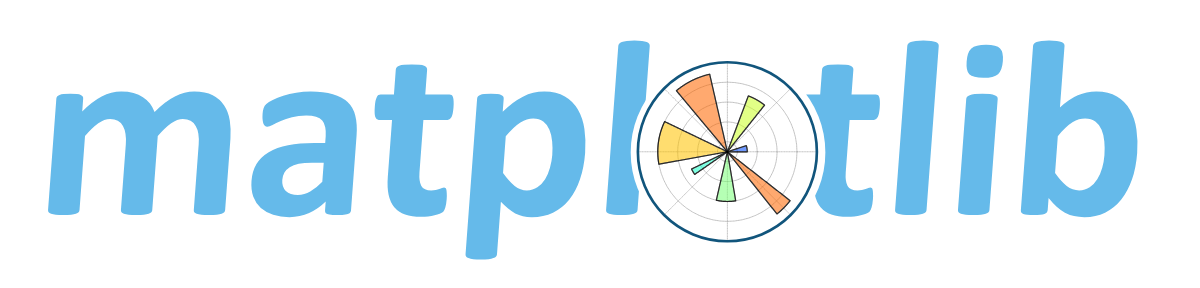

### 📈 Crear Gráficas en Python con `matplotlib`
Importar la librería y crear una gráfica básica.

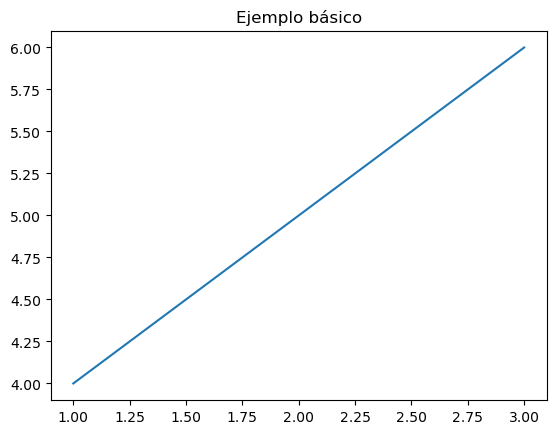

In [7]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Ejemplo básico")
plt.show()

### 📊 Gráficos de Dispersión
Útiles para explorar la relación entre dos variables numéricas.

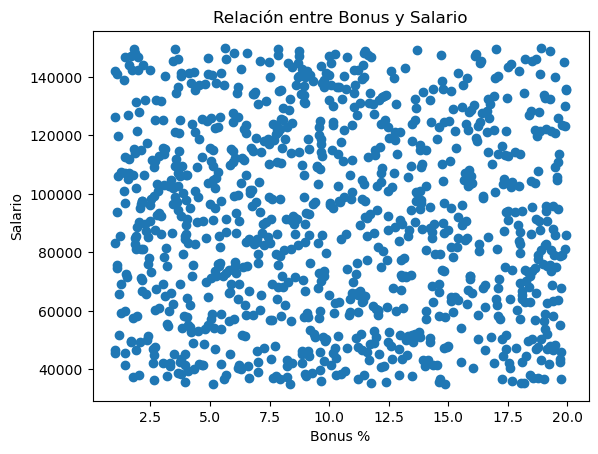

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(df["Bonus %"], df["Salary"])
plt.xlabel("Bonus %")
plt.ylabel("Salario")
plt.title("Relación entre Bonus y Salario")
plt.show()

### 📉 Gráficos de Líneas
Ideales para datos en el tiempo.

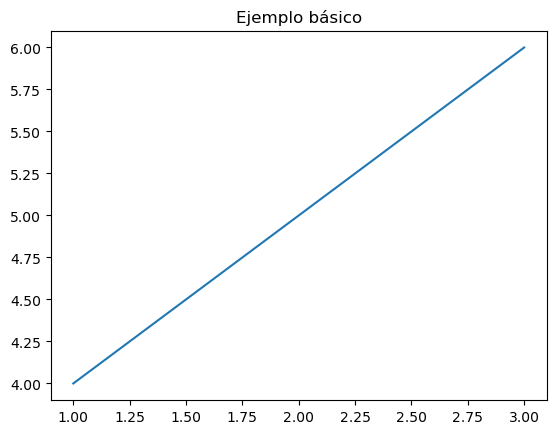

In [9]:
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Ejemplo básico")
plt.show()

### 📊 Gráficos de Barras
Comparan cantidades entre categorías.

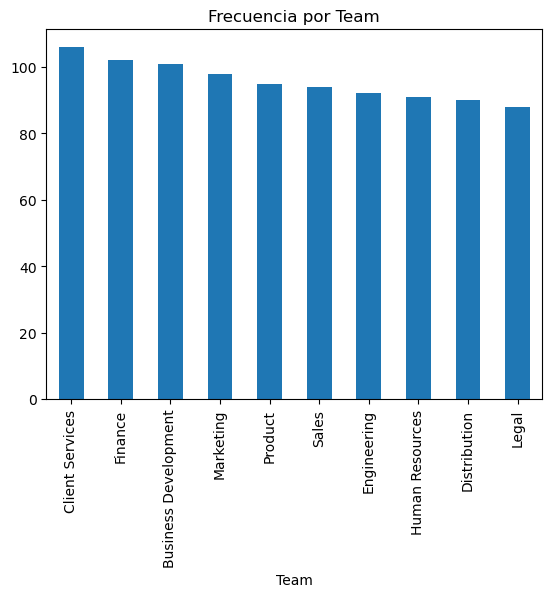

In [10]:
df["Team"].value_counts().plot(kind="bar")
plt.title("Frecuencia por Team")
plt.show()

### 📊 Histogramas
Muestran la distribución de una variable numérica.

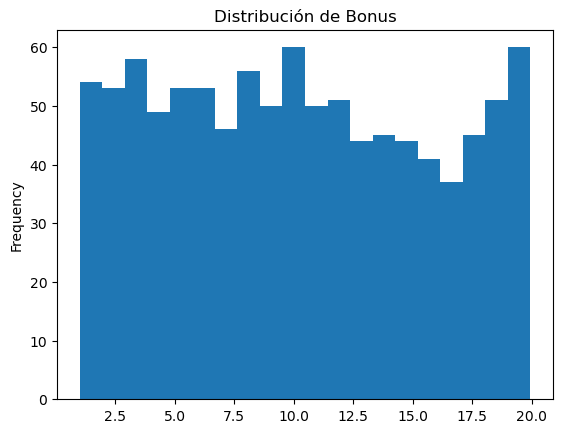

In [11]:
df["Bonus %"].plot(kind="hist", bins=20)
plt.title("Distribución de Bonus")
plt.show()